# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

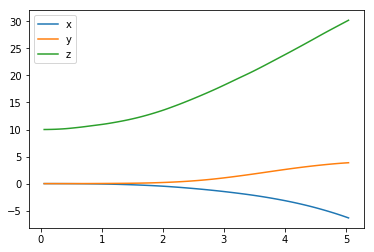

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

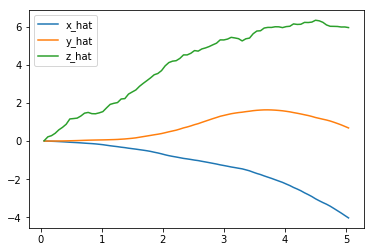

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

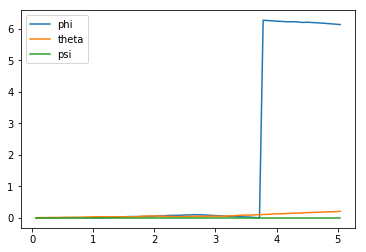

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

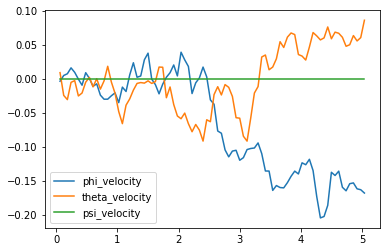

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

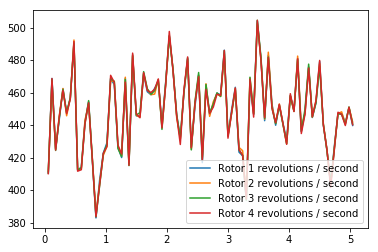

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -6.34246893   3.85976757  30.19979069   6.13832289   0.21075694   0.        ]
[-4.02985234  0.68814512  5.95085743]
[-0.16774475  0.08604531  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.371 (best =  -0.035), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## My Utility Functions

### Plotting Episode Data

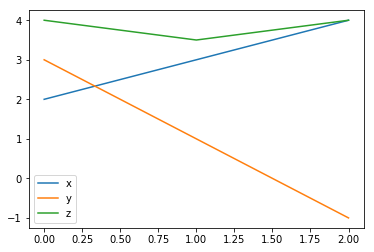

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotSimulation(time, *var_results, labels=('x','y','z')):
    """Plots results from a simulation.
    Params
    ======
        labels: the array of elapsed time
        labels: the labels for each
        init_angle_velocities: initial radians/second for each of the three Euler angles
        runtime: time limit for each episode
        target_pos: target/goal (x,y,z) position for the agent
    """
    for i,result in enumerate(var_results):
        plt.plot(time, result, label=labels[i])
    plt.legend()
    _ = plt.ylim()
    plt.show()
    
#Test Plot
plotSimulation([0,1,2], [2,3,4], [3,1,-1],[4,3.5,4])

### Generalized Training Code

In [5]:
import sys
import pandas as pd
import numpy as np
from collections import deque

def train(task, agent, num_episodes=400, plot_details_every = 20, record_average_every = 10):
    tmp_scores = deque(maxlen=record_average_every)
    scores = deque(maxlen=num_episodes)
    best_score = -np.inf

    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        t = []
        xyz = []
        rpms = []             
        score = 0

        while True:
            action = agent.act(state)
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state
            score += reward

            if (plot_details_every > 0 and i_episode % plot_details_every == 0):
                t.append(task.sim.time)
                if len(xyz)==0:
                    xyz=[task.sim.pose[0:3]]
                    rpms=[action]
                else:
                    xyz = np.vstack((xyz, task.sim.pose[0:3]))
                    rpms = np.vstack((rpms, action))

            if done:
                tmp_scores.append(score)
                if score > best_score:
                    best_score = score
                print("\rEpisode = {:4d}, total reward = {:7.3f}, best = {:7.3f}, average = {:7.3f}".format(
                    i_episode, score, best_score, np.mean(tmp_scores)), end="")  # [debug]
                break
        
        #episode finished
        if not agent.on_policy:
            agent.learn()
        sys.stdout.flush()
        
        if i_episode % record_average_every == 0:
            scores.append(np.mean(tmp_scores))

        if (plot_details_every > 0 and i_episode % plot_details_every == 0):
            try:
                plotSimulation(t,xyz[:,0],xyz[:,1],xyz[:,2],labels=('x','y','z'))
                if np.shape(rpms)[1] == 1:
                    plotSimulation(t,rpms[:,0], labels = ('RPMs',))
                elif np.shape(rpms)[1] == 4:
                    plotSimulation(t,rpms[:,0], rpms[:,1], rpms[:,2], rpms[:,3], labels = ('RPM0','RPM1','RPM2','RPM3'))
                else:
                    print('rpms', rpms)

            except Exception as e:
                print('sometimes the plot fails. ', e)
                #like when the starting position is 0,0,0
                print('xyz',xyz)
                print(rpms)
    return scores, num_episodes, record_average_every

### Plotting Training Results

In [6]:
def graphResults(scores, num_episodes, record_average_every):
    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(scores),endpoint=False),np.asarray(scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over %d Episodes)' % num_episodes)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % record_average_every), np.max(scores))

## Task 1: Take Off with Linked Rotors
* simplest task imaginable
* 3 state variables (dz, vz, az)
* 1 action output (RPM)

Episode =    1, total reward = 556.806, best = 556.806, average = 556.806

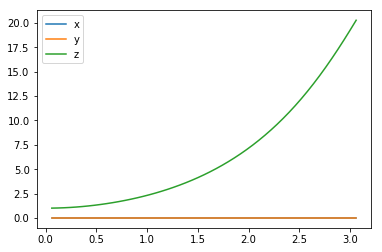

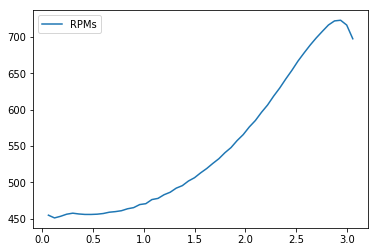

Episode =    2, total reward = 412.088, best = 556.806, average = 412.088

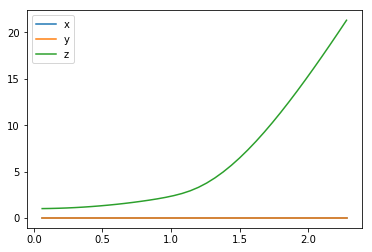

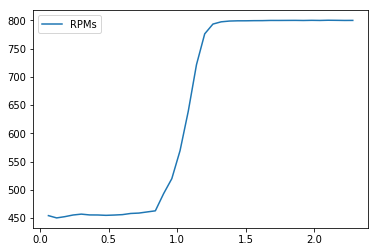

Episode =    3, total reward = 263.218, best = 556.806, average = 263.218

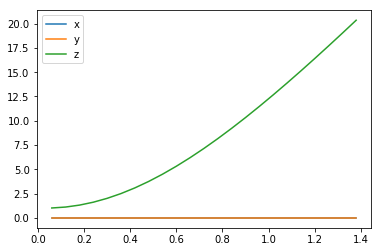

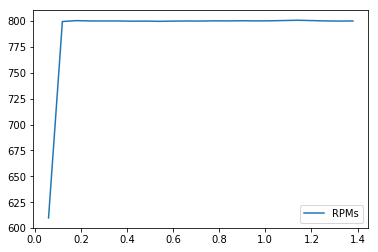

Episode =    4, total reward = 265.125, best = 556.806, average = 265.125

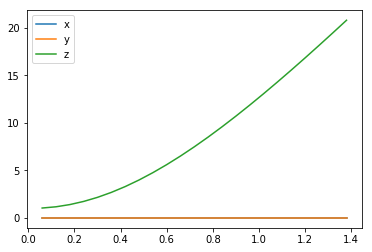

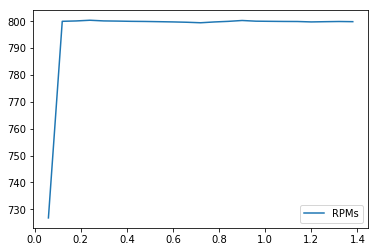

Episode =    5, total reward = 266.120, best = 556.806, average = 266.120

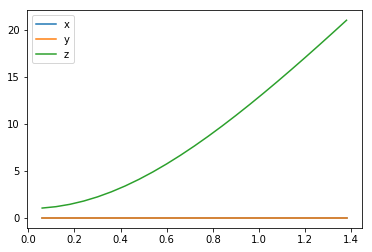

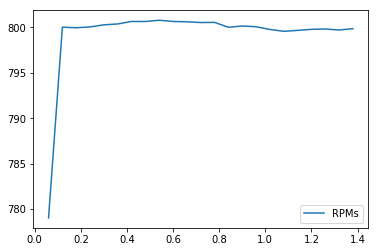

Episode =    6, total reward = 266.315, best = 556.806, average = 266.315

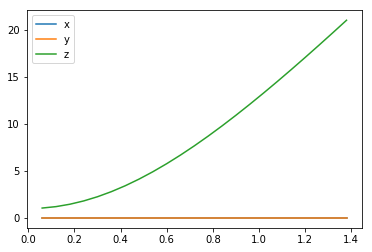

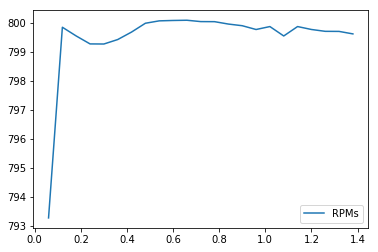

Episode =    7, total reward = 266.484, best = 556.806, average = 266.484

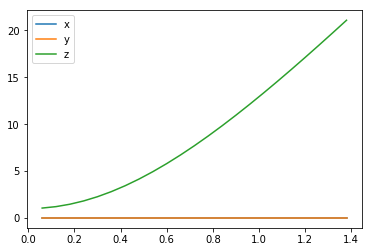

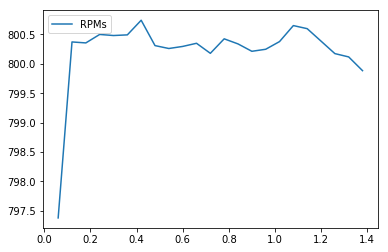

Episode =    8, total reward = 266.419, best = 556.806, average = 266.419

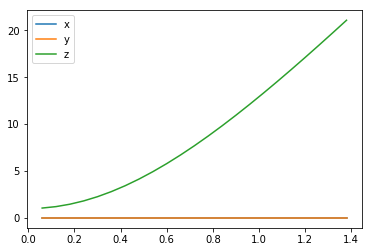

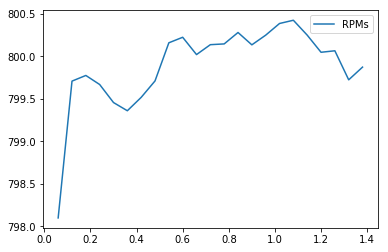

Episode =    9, total reward = 266.501, best = 556.806, average = 266.501

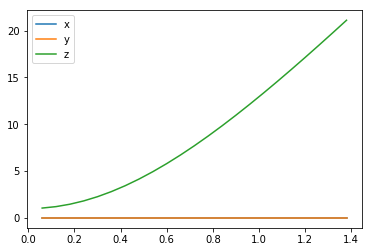

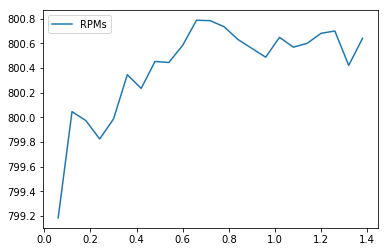

Episode =   10, total reward = 266.482, best = 556.806, average = 266.482

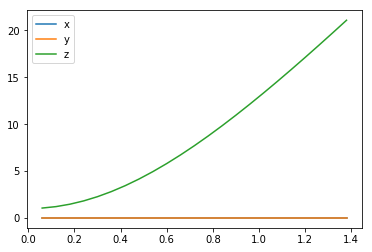

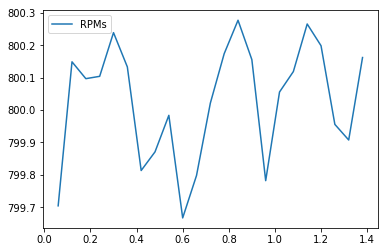

Episode =   11, total reward = 266.459, best = 556.806, average = 266.459

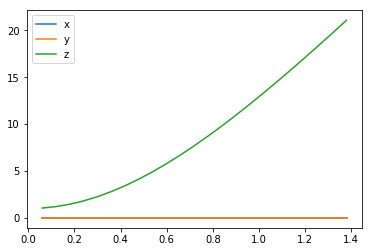

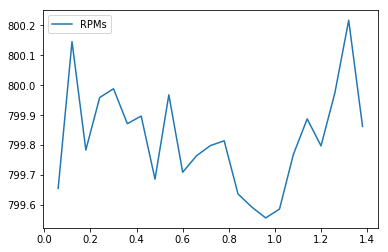

Episode =   12, total reward = 266.461, best = 556.806, average = 266.461

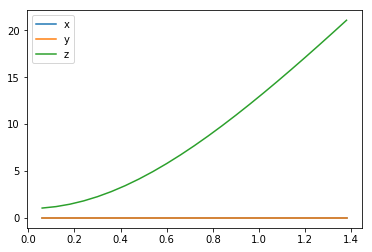

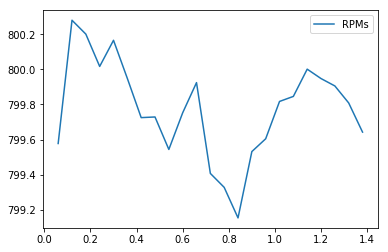

Episode =   13, total reward = 266.523, best = 556.806, average = 266.523

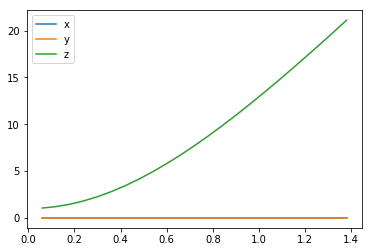

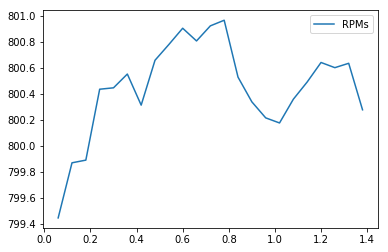

Episode =   14, total reward = 266.503, best = 556.806, average = 266.503

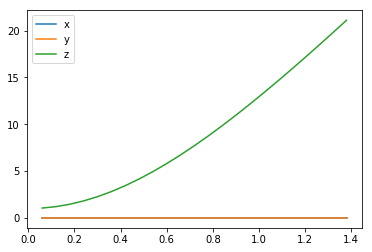

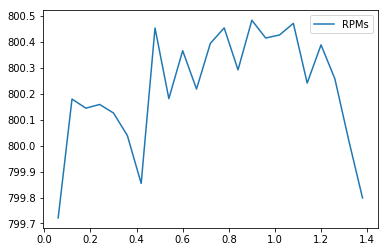

Episode =   15, total reward = 266.493, best = 556.806, average = 266.493

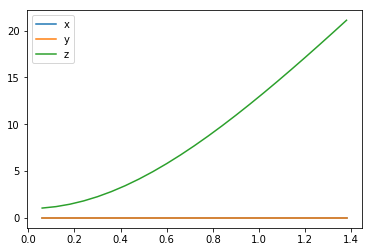

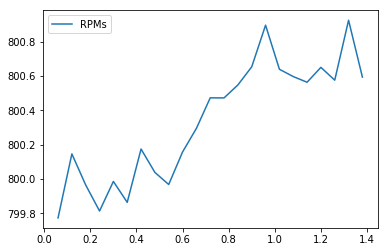

Episode =   16, total reward = 266.468, best = 556.806, average = 266.468

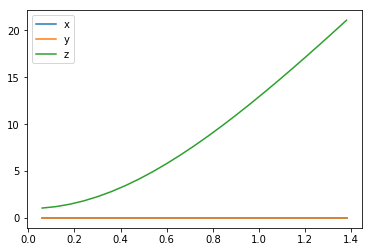

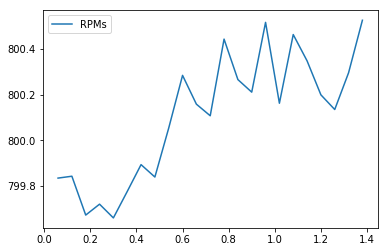

Episode =   17, total reward = 266.475, best = 556.806, average = 266.475

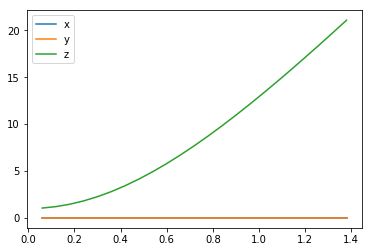

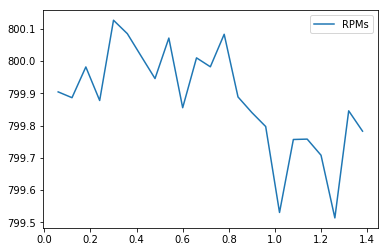

Episode =   18, total reward = 266.447, best = 556.806, average = 266.447

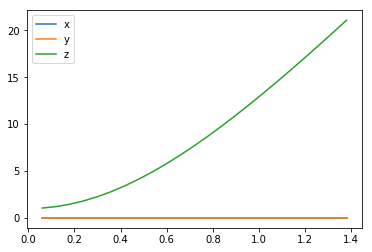

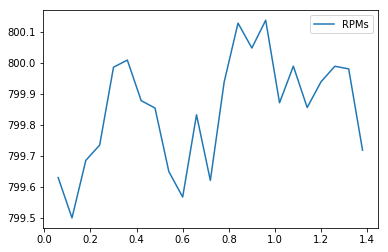

Episode =   19, total reward = 266.477, best = 556.806, average = 266.477

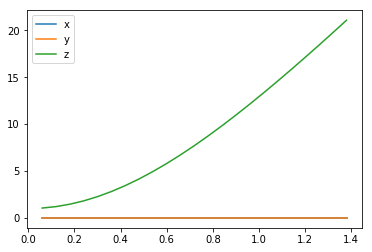

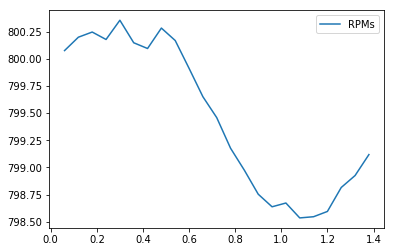

Episode =   20, total reward = 266.496, best = 556.806, average = 266.496

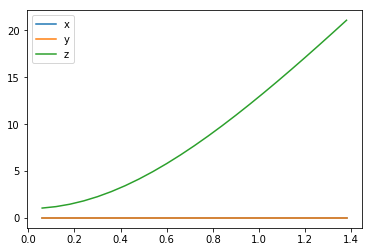

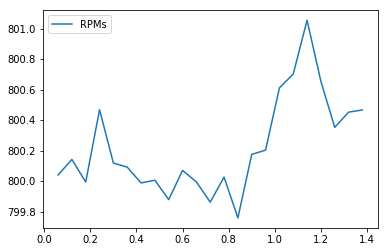

In [7]:
from agents.agent import DDPG_Agent
from task_TakeOffLinkedRotors import task_TakeOffLinkedRotors

init_pose = np.array([0., 0., 1, 0., 0., 0.])
target_pos = np.array([0., 0., 20.])
task = task_TakeOffLinkedRotors(target_pos=target_pos, runtime= 5, init_pose=init_pose)
task.action_low = 100
task.action_high = 800
agent = DDPG_Agent(task)

s1, e1, av1 = train(task, agent, num_episodes=20, plot_details_every=1, record_average_every=1)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

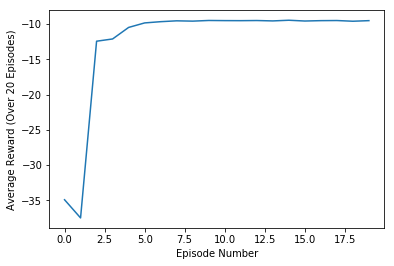

Best Average Reward over 1 Episodes:  -9.4587229526


In [30]:
graphResults(s1,e1,av1)

## Task 2: Hover with Linked Rotors
* intermediate task
* 3 state variables (dz, vz, az)
* 1 action output (RPM)
* added batch normalization, which greatly improved stability

Episode =   10, total reward = 261.748, best = 493.132, average = 154.326

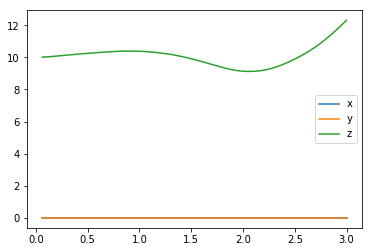

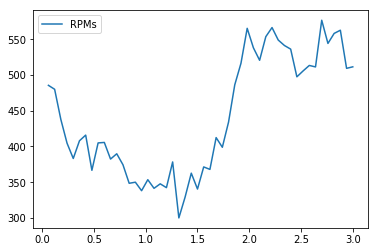

Episode =   20, total reward =  67.482, best = 528.838, average = 188.365

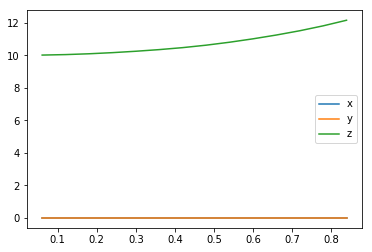

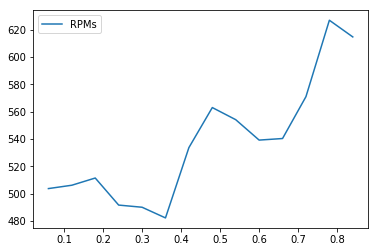

Episode =   30, total reward =  83.885, best = 528.838, average = 129.287

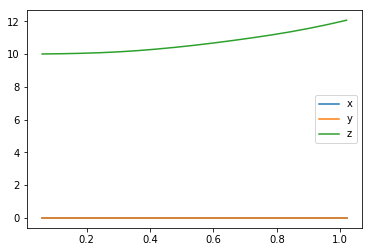

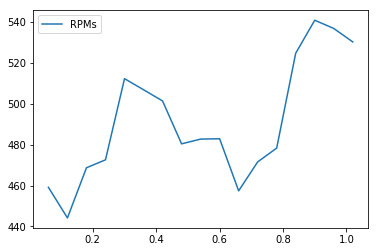

Episode =   40, total reward = 135.116, best = 528.838, average = 121.556

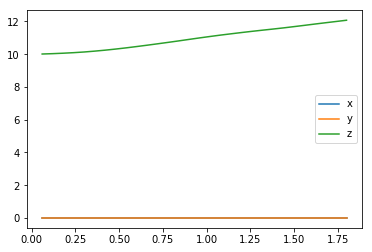

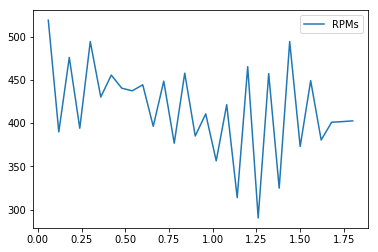

Episode =   50, total reward = 369.703, best = 617.242, average = 317.633

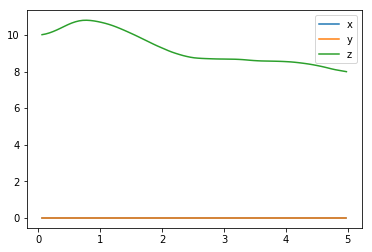

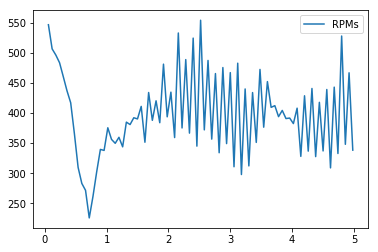

Episode =   60, total reward = 155.592, best = 828.468, average = 252.281

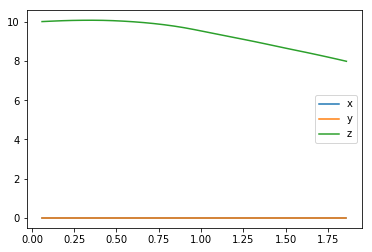

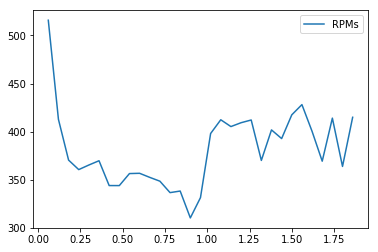

Episode =   70, total reward = 184.665, best = 11792.471, average = 1593.04142

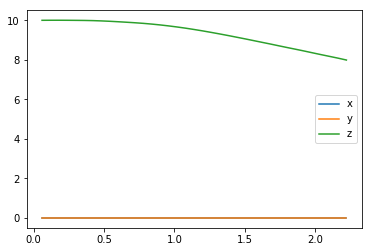

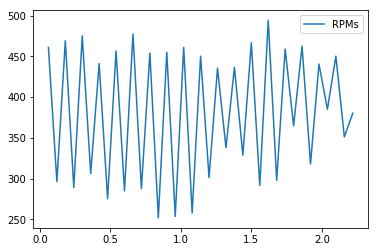

Episode =   80, total reward =  62.291, best = 11792.471, average = 388.0497

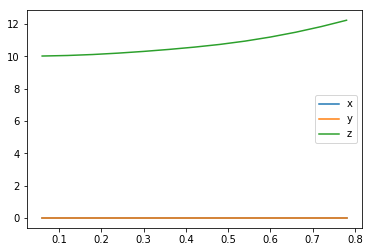

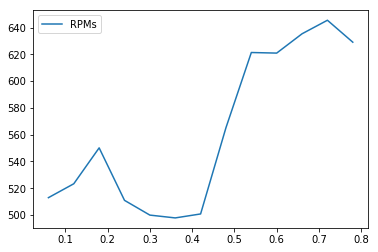

Episode =   90, total reward =  67.308, best = 11792.471, average =  72.607

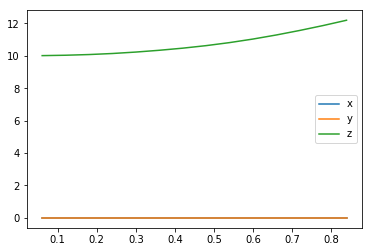

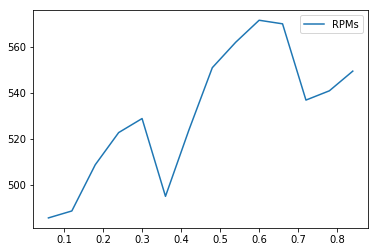

Episode =  100, total reward = 138.584, best = 11792.471, average = 1706.88849

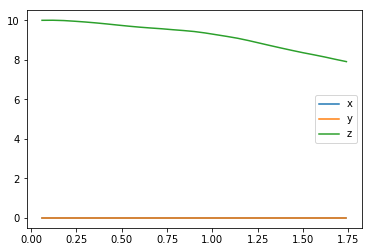

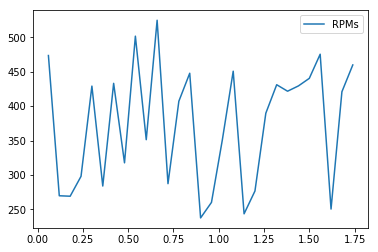

In [40]:
from agents.agent2 import DDPG_Agent2
from task_HoverLinkedRotors2 import task_HoverLinkedRotors2

init_pose = np.array([0., 0., 10., 0., 0., 0.])
target_pos = np.array([0., 0., 10.])
task = task_HoverLinkedRotors2(target_pos=target_pos, runtime= 10000, init_pose=init_pose)
task.action_low = 300
task.action_high = 500
agent = DDPG_Agent2(task)
#agent.
agent.dynamic_noise=True

s2, e2, av2 = train(task, agent, num_episodes=100, plot_details_every=10, record_average_every=10)

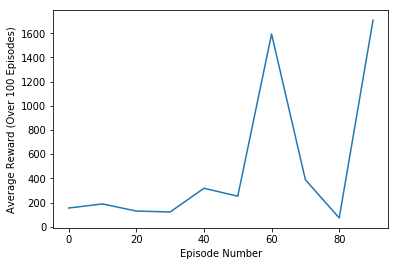

Best Average Reward over 10 Episodes:  1706.88774553


In [42]:
graphResults(s2,e2,av2)

## Task 3: Hover with Independent Rotors
* complex task
* 10 state variables (dx, dy, dz, vx, vy, vz, ax, ay, az, yaw)
* 4 action output (RPMs)
* using same model as Task2, with additional reward/constraints.

Episode =  100, total reward =  10.910, best =  20.133, average =  10.010

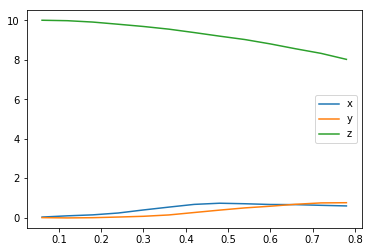

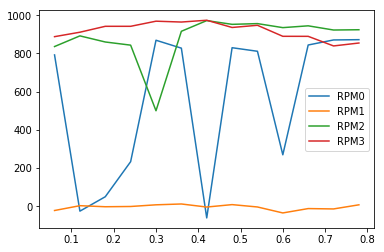

Episode =  200, total reward =   9.799, best =  20.133, average =   9.962

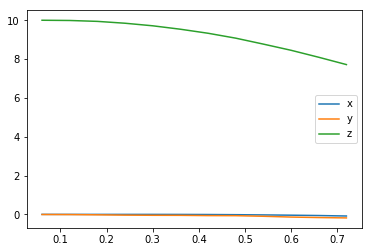

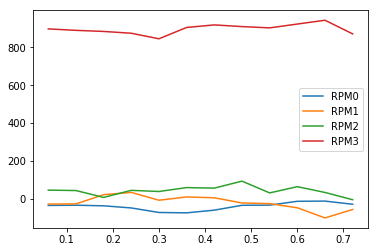

Episode =  300, total reward =  12.695, best =  20.133, average =  10.726

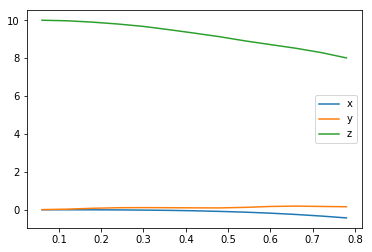

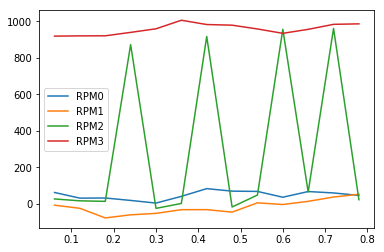

Episode =  400, total reward =  12.382, best =  20.133, average =  10.542

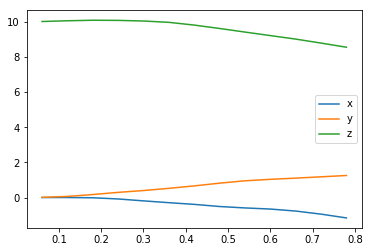

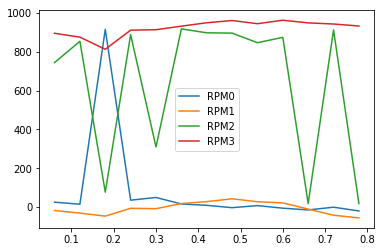

Episode =  500, total reward =  11.379, best =  20.133, average =   8.207

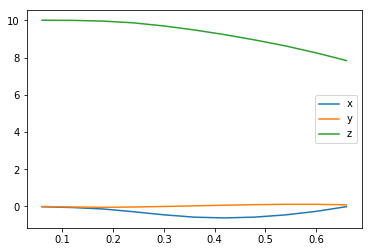

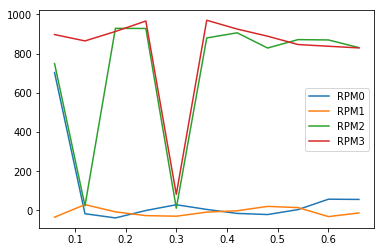

Episode =  600, total reward =  10.508, best =  20.133, average =   9.136

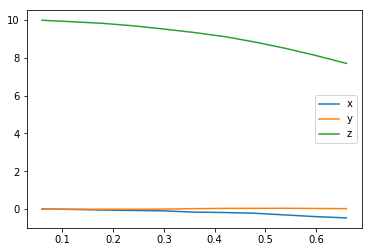

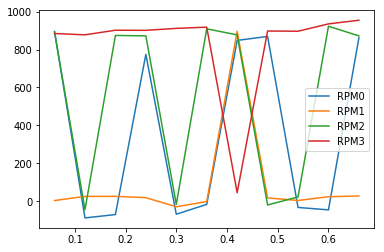

Episode =  700, total reward =  10.203, best =  20.133, average =   9.910

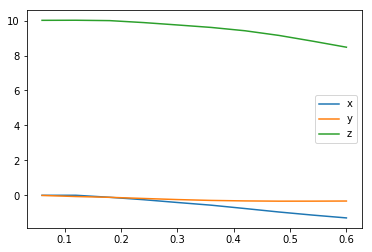

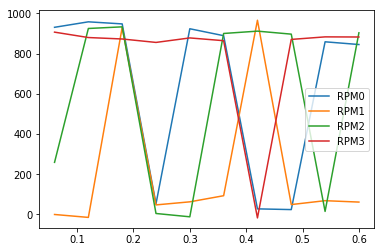

Episode =  800, total reward =  12.911, best =  20.133, average =   9.953

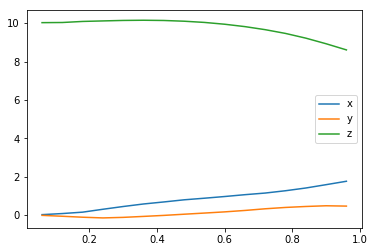

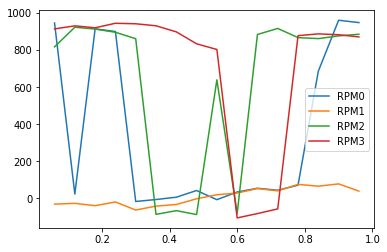

Episode =  900, total reward =   8.802, best =  20.133, average =  10.973

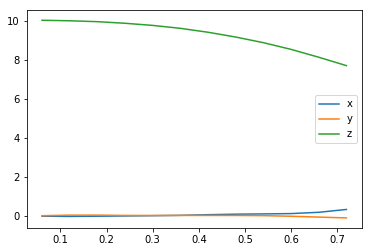

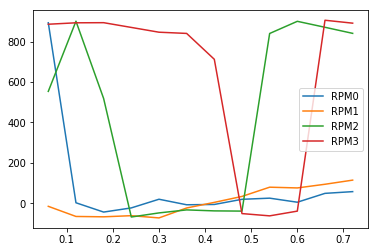

Episode = 1000, total reward =   7.985, best =  20.133, average =  10.357

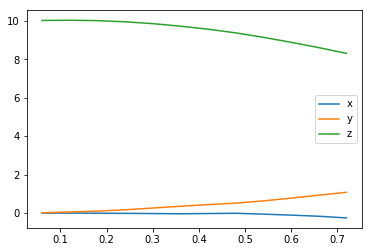

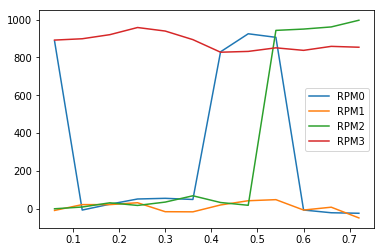

In [9]:
from agents.agent2 import DDPG_Agent2
from task_Hover_Full import task_Hover_Full

init_pose = np.array([0., 0., 10., 0., 0., 0.])
target_pos = np.array([0., 0., 10.])
task = task_Hover_Full(target_pos=target_pos, runtime= 10, init_pose=init_pose)
task.action_low = 0
task.action_high = 900
task.sphere_radius=2
agent = DDPG_Agent2(task)
agent.dynamic_noise=True

s3, e3, av3 = train(task, agent, num_episodes=1000, plot_details_every=100, record_average_every=10)

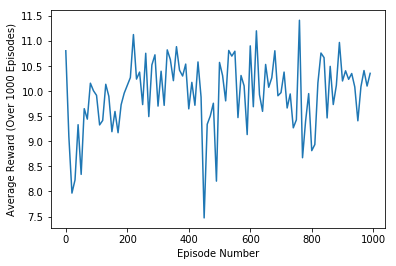

Best Average Reward over 10 Episodes:  11.4162436861


In [10]:
graphResults(s3,e3,av3)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I designed 3 tasks. **Task 1** is a basic take off task with linked rotor control. It uses one output to control all the rotors and was the simplest version of the problem possible. With this simplified problem, only elements pertaining to the z-axis were included in the state variables. I designed the reward + task such that the task ends at a specific time with linearly increasing rewards, the higher it goes. (The reward is 1 when at the target height, increasingly negative when below, increasingly positive when above. This encourages the agent to fly upward. * **Task 2** is a hover task with linked rotor control. This was the next logical step. It uses one output to control all the rotors with a goal to hover at the start height. Again, this only needs z-axis state variables. I designed the reward + task such that the task ends when the agent leaves the bounds of two planes, above and below (the floor and ceiling). All rewards are positive with the most positive rewards at the target height. * **Task 3** is a hover task (the same as Task 2 but) with independent rotors. It uses 4 outputs to control the rotors independently. This requires multi-axis position and angle variables. I designed the reward + task such that the task ends when the agent leaves the bounds of a sphere around the target position. The reward function is linear reward that is a function of the distance from the center of the cube with additional rewards for keeping yaw fixed and velocities minimized.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: I used Deep Deterministic Policy Gradients (DDPG) actor-critic with batch normalization. I used a stochastic reward buffer and Ornstein–Uhlenbeck Noise, which I scaled (in the hover tasks) to increase noise once the network stabilized in an attempt to ensure convergence was robust and not just at a local maximum. **Actor** was Input-Relu32-BatchNormalize-Relu64-BatchNormalize-Relu32-BatchNormalize-DenseSigmoid-LamdaRangeScale. **Critic** was (Input-Relu32-BatchNormalize-Relu64-BatchNormalize) x 2 merged at a combined layer then Relu-BatchNormalize-Dense. I used the same hyperparameters as the original paper on DDPG: gamma = 0.99, tau = 0.01. Noise was scaled to 25 RPM at max for the hover tasks.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: Task 1 was easy. Task 2 was harder, but still reasonable. started out gradually, had an "aha moment", and then fluxuated. The rewards eventually were great. I got worried in task 2 that the simulation had learned so well it was going to simulate for the full runtime. In task 3, I shortened 10000 to 100 seconds, and added a parameter to force it to try to reduce the velocity noise. Task 3 was very hard. It did not converge nicely like the first 2 tasks.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: I thought it was cool, then I was frustrated, then I was more frustrated, then I felt good for figuring most of it out, but silly for not asking the slack community. I have tried to ask my mentor, but I don't think he knew how to help on this project. So I read a lot of papers. I feel like we learned a ton of information in the last section and then were dropped into the project. For 1-2 weeks, I struggled trying to reconcile my knowledge of discrete vs. continuous tasks. It took me a while of reading research papers to realize that some of the models presented don't port easily to continuous space, especially continuous action space. There are a ton of variables and algorithms to keep track of and there didn't seem to be a clear delineation of when to use which. This partially makes sense because this is emerging technology with the majority of the information in research papers or grad school slide presentations. Personally, I want to keep working on the realistic hover task and go back and write a summary of the reinforcement learning tools. I want to make my own list with each algorithm, the associated terms, how well it works with discrete and continuous action and state space, links to papers, and example implementations. And then I would like to understand which pieces can replace each other properly. Because right now, it is a bit muddled in my head.


**BUT** all of this said, this is a great project, I enjoyed learning. My main suggestion to increase the knowledge of students is to do one guided project in continuous approach space to approach it a bit more gradually. In the end, I had fun.


Interesting behavior... I suspect that I may have designed a reward function at some point in the hover task that crashed in order to avoid having to deal with repeated negative rewards.